In [35]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import os

DIRECTORY_PATH = 'data/GRANULE/L2A_T33TVM_A048639_20241014T101725/IMG_DATA'


BLUE_BAND_10M_FILENAME = 'B04_10m.jp2'
BLUE_BAND_20M_FILENAME = 'B04_20m.jp2'
BLUE_BAND_60M_FILENAME = 'B04_60m.jp2'
GREEN_BAND_10M_FILENAME = 'B03_10m.jp2'
GREEN_BAND_20M_FILENAME = 'B03_20m.jp2'
GREEN_BAND_60M_FILENAME = 'B03_60m.jp2'
RED_BAND_10M_FILENAME = 'B04_10m.jp2'
RED_BAND_20M_FILENAME = 'B04_20m.jp2'
RED_BAND_60M_FILENAME = 'B04_60m.jp2'
NIR_BAND_10M_FILENAME = 'B08_10m.jp2'
NEAR_RED_BAND_20M_FILENAME = 'B8A_20m.jp2'
NEAR_NIR_BAND_60M_FILENAME = 'B8A_60m.jp2'
WATER_VAPOR_BAND_60M_FILENAME = 'B09_60m.jp2'
SWIR_BAND_20M_FILENAME = 'B11_20m.jp2'
SWIR_BAND_60M_FILENAME = 'B11_60m.jp2'


In [36]:
def calculate_evi(nir_band_path, red_band_path, blue_band_path):
    red_band = rasterio.open(red_band_path).read(1)
    blue_band = rasterio.open(blue_band_path).read(1)
    nir_band = rasterio.open(nir_band_path).read(1)

    evi = (nir_band - red_band) / (nir_band + 6 * red_band - 7.5 * blue_band + 1)

    plt.figure(figsize=(10,6))
    plt.imshow(evi, cmap='RdYlGn')
    plt.colorbar()
    plt.title("EVI")
    plt.show()

def calculate_ndvi(nir_band_path, red_band_path): #NIR(8) and Red band (4) 10m resolution
    red_band = rasterio.open(red_band_path).read(1)
    nir_band = rasterio.open(nir_band_path).read(1)
    
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    
    plt.figure(figsize=(10,6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar()
    plt.title("NDVI")
    plt.show()

def calculate_gndvi(green_band_path, nir_band_path):
    green_band = rasterio.open(green_band_path).read(1)
    nir_band = rasterio.open(nir_band_path).read(1)

    gndvi = (nir_band - green_band) / (nir_band + green_band)

    plt.figure(figsize=(10,6))
    plt.imshow(gndvi, cmap='RdYlGn')
    plt.colorbar()
    plt.title("GNDVI")
    plt.show()

def calculate_msi(swir_path, near_nir_band_path): #NIR 20M
    swir_band = rasterio.open(swir_path).read(1)
    near_nri_band = rasterio.open(near_nir_band_path).read(1)

    msi = swir_band / near_nri_band

    plt.figure(figsize=(10,6))
    plt.imshow(msi, cmap='RdYlBu')
    plt.colorbar()
    plt.title("MSI")
    plt.show()

def calculate_ndwi(green_band_path, swir_band_path): #SWIR 20M
    green_band = rasterio.open(green_band_path).read(1)
    swir_band = rasterio.open(swir_band_path).read(1)

    ndwi = (green_band - swir_band) / (green_band + swir_band)

    plt.figure(figsize=(10,6))
    plt.imshow(ndwi, cmap='Blues')
    plt.colorbar()
    plt.title("NDWI")
    plt.show()

def calculate_ndbi(swir_band_path, near_nir_band_path): #SWIR & NIR 20M
    swir_band = rasterio.open(swir_band_path).read(1)
    near_nir_band = rasterio.open(near_nir_band_path).read(1)

    ndbi = (swir_band - near_nir_band) / (swir_band + near_nir_band)

    plt.figure(figsize=(10,6))
    plt.imshow(ndbi, cmap='RdYlBu')
    plt.colorbar()
    plt.title("NDBI")
    plt.show()

def calculate_ndmi(water_vapor_band_path, near_nir_band_path): #Near NIR 60M
    water_vapor_band = rasterio.open(water_vapor_band_path).read(1)
    near_nir_band = rasterio.open(near_nir_band_path).read(1)

    ndmi = (water_vapor_band - near_nir_band) / (water_vapor_band + near_nir_band)

    plt.figure(figsize=(10,6))
    plt.imshow(ndmi, cmap='BrBG')
    plt.colorbar()
    plt.title("NDMI")
    plt.show()



red_band_path = glob.glob(os.path.join(DIRECTORY_PATH, '*' + BLUE_BAND_10M_FILENAME))

print(red_band_path)

    


['data/GRANULE/L2A_T33TVM_A048639_20241014T101725/IMG_DATA/T33TVM_20241014T101021_B04_10m.jp2']


/tmp/ipykernel_20743/3622613604.py:24: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((red_band + nir_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
/tmp/ipykernel_20743/3622613604.py:25: RuntimeWarning: divide by zero encountered in divide
  evi = (nir_band - red_band) / (nir_band + 6 * red_band - 7.5 * blue_band + 1)
/tmp/ipykernel_20743/3622613604.py:27: RuntimeWarning: invalid value encountered in divide
  ndwi = np.where((swir_band + green_band) == 0, 0, (green_band - swir_band) / (green_band + swir_band))
/tmp/ipykernel_20743/3622613604.py:28: RuntimeWarning: invalid value encountered in divide
  msi = swir_band / n_nir_band


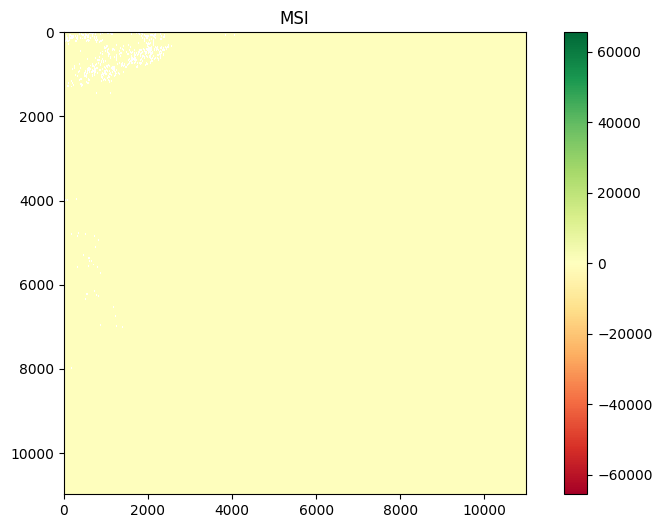

In [3]:

plt.figure(figsize=(10,6))
plt.imshow(evi, cmap='RdYlGn')
plt.colorbar()
plt.title("MSI")
plt.show()

# plt.figure(figsize=(10,6))
# plt.imshow(ndwi, cmap='Blues', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title("NDWI")
# plt.show()

